<a href="https://colab.research.google.com/github/myungjinma/acorn_python/blob/main/0812_67%EC%9D%BC%EC%B0%A8_ML(SVC%2C_Kernel%2C_RBF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
X = np.array(([3,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]))
y = np.array([-1, -1, -1, 1,1,1])

In [15]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
clf.fit(X, y)

SVC(kernel='linear')

In [16]:
clf.coef_

array([[ 0.25, -0.25]])

In [17]:
w0 = clf.coef_[0][0]

In [18]:
w1 = clf.coef_[0][1]

In [19]:
clf.intercept_

array([-0.75])

In [20]:
b = clf.intercept_[0]

In [21]:
a = -w0/w1 #기울기

In [22]:
a

1.0

In [23]:
b = -b/w1 #절편

In [24]:
b

-3.0

In [25]:
half_margin = 1/w1

In [26]:
x_data = np.arange(11)

In [28]:
hyperline = a* x_data + b
down_line = hyperline + half_margin
up_line = hyperline - half_margin

In [31]:
X[:,0][y ==-1]

array([3, 1, 2])

Text(2.5, 1.7, '$2 /sqrt{2}$')

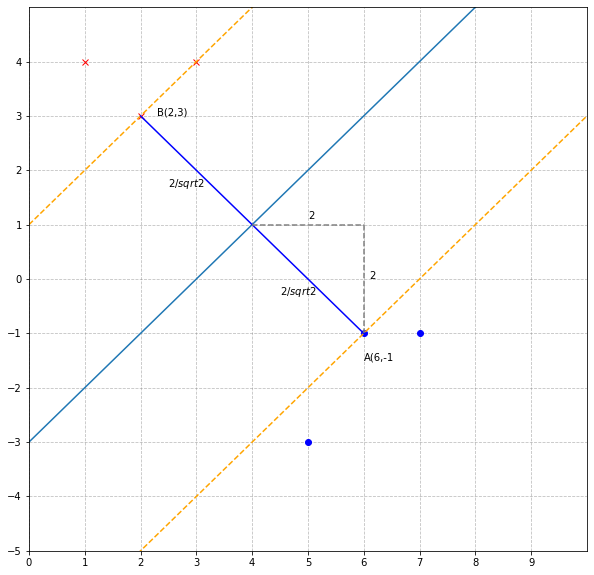

In [36]:
plt.figure(figsize = (10,10))
plt.plot(X[:, 0][y ==-1], X[: , 1][y ==-1], 'rx')
plt.plot(X[:, 0][y ==1], X[:,1][y==1],'bo')
plt.plot(x_data, hyperline)
plt.plot(x_data, up_line, '--', color='orange')
plt.plot(x_data, down_line, '--', color='orange')
plt.ylim(-5, 5)
plt.xlim(0,10)
plt.plot([2, 6], [3,-1], color='b')
plt.yticks(np.arange(plt.ylim()[0],plt.ylim()[1],1))
plt.xticks(np.arange(plt.xlim()[0],plt.xlim()[1],1))
plt.grid(True, color='gray', alpha=0.5, linestyle='--')
plt.text(2.3, 3, 'B(2,3)')
plt.text(6,-1.5 , 'A(6,-1')
plt.plot([4,6], [1,1], '--', color='gray')
plt.plot([6,6], [1,-1], '--', color='gray')
plt.text(5, 1.1, '2')
plt.text(6.1, 0, '2')
plt.text(4.5, -0.3, r'$2 /sqrt{2}$')
plt.text(2.5, 1.7, r'$2 /sqrt{2}$')

In [38]:
print('Indices of support vectors =', clf.support_)
print('Support vector = ', clf.support_vectors_)

Indices of support vectors = [2 3]
Support vector =  [[ 2.  3.]
 [ 6. -1.]]


In [39]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

In [40]:
cancer = load_breast_cancer()

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [43]:
svc = SVC()

In [44]:
svc.fit(X_train, y_train)

SVC()

In [45]:
svc.score(X_test, y_test)

0.9370629370629371

In [46]:
svc.score(X_train, y_train)

0.903755868544601

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [48]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
svc = SVC()

In [50]:
svc.fit(X_train_scaled, y_train)

SVC()

In [52]:
svc.score(X_test_scaled, y_test)

0.972027972027972

In [53]:
svc.score(X_train_scaled, y_train)

0.9835680751173709

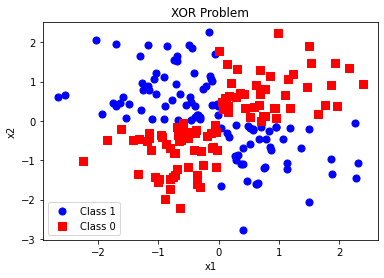

In [54]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1]> 0) #한개만 참일때 True, 나머지는 False
y_xor = np.where(y_xor, 1, 0) #True는 1로, 나머지는 0으로 고치기
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1],
            c = 'b', marker = 'o', label = 'Class 1', s = 50)
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1],
            c = 'r', marker = 's', label = 'Class 0', s = 50)
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('XOR Problem')
plt.show()

In [59]:
X_xor

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252],
       [-0.88778575, -1.98079647],
       [-0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985],
       [-0.38732682, -0.30230275],
       [-1.04855297, -1.42001794],
       [-1.70627019,  1.9507754 ],
       [-0.50965218, -0.4380743 ],
       [-1.25279536,  0.77749036],
       [-1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218],
       [-0.02818223,  0.42833187],
       [ 0.06651722,

In [55]:
from sklearn.svm import SVC
import matplotlib as mpl

svc = SVC(kernel = 'linear').fit(X_xor, y_xor)


In [56]:
def plot_xor(X, y, model, title, xmin=-3, xmax=3, ymin=-3, ymax=3):
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b',
                marker='o', label='클래스 1', s=50)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r',
                marker='s', label='클래스 0', s=50)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")


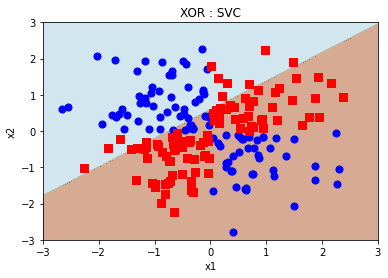

In [58]:
plot_xor(X_xor, y_xor, svc , 'XOR : SVC')

#Kernel

평면적 데이터를 입체적 데이터로 변환해줌

$$ (0,0) => (0,0,0)$$

$$ (0,1) => (0,0,1)$$

$$ (1,0) => (1,0,0)$$

$$ (1,1) => (1,  2,1)$$






Kernel Function 의 정의

$$K(x_i,x_j) = ϕ(x_1) · ϕ(x_2)$$

$$K(x_i, x_j) = (x_i · x_j)$$

$$X =< x_1, x_2 > , Z =< z_1, z_2 > 이고, d = 1일때, 커널함수는$$

$$K(< x_1, x_2> , <z_1, z_2 >) =<x_1 , x_2 > · <z_1,  z_2 >$$

$$= x_1z_1 + x_2z_2$$

$$ = X·Z $$


In [60]:
X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [61]:
from sklearn.preprocessing import FunctionTransformer

In [62]:
def basis(X):
  return np.vstack([X[:,0]**2, np.sqrt(2)*X[:,0]*X[:,1], X[:,1]**2]).T

FunctionTransformer(basis).fit_transform(X)

array([[ 0.        ,  0.        ,  1.        ],
       [ 4.        ,  8.48528137,  9.        ],
       [16.        , 28.28427125, 25.        ]])

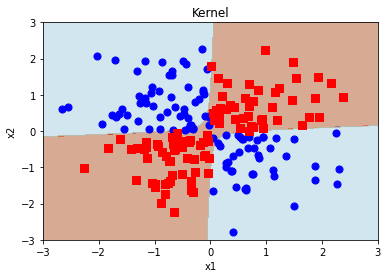

In [63]:
from sklearn.pipeline import Pipeline

basismodel = Pipeline([('basis', FunctionTransformer(basis)),
                       ('svc', SVC(kernel = 'linear'))]).fit(X_xor, y_xor)
plot_xor(X_xor, y_xor, basismodel, 'Kernel')
plt.show()

#RBF 커널

- 지수함수의 테일러 전개를 이용한 기법

Text(0.5, 1.0, 'RBF Kernel')

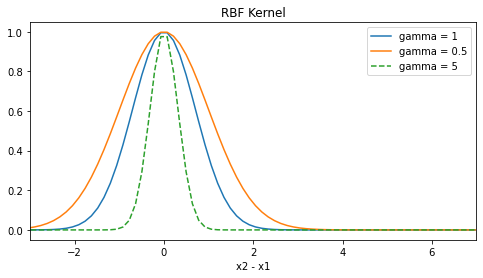

In [65]:
x1 = 0.0
x2 = np.linspace(-7, 7, 100)

def rbf(x1, x2, gamma):
  return np.exp(-gamma * np.abs(x2 - x1) **2)

plt.figure(figsize= (8,4))
plt.subplot(111)
plt.plot(x2, rbf(x1, x2 , 1), ls = '-', label= 'gamma = 1')
plt.plot(x2, rbf(x1, x2 , 0.5), ls = '-', label= 'gamma = 0.5')
plt.plot(x2, rbf(x1, x2 , 5), ls = '--', label= 'gamma = 5')
plt.xlabel('x2 - x1')
plt.xlim(-3, 7)
plt.legend(loc=1)
plt.title('RBF Kernel')

In [66]:
pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 9.6 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=9a3233ce851e94e0f5f433c4b9e220e2ec09f08e6aecf6a4c5837020cc9ca756
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [67]:
import mglearn

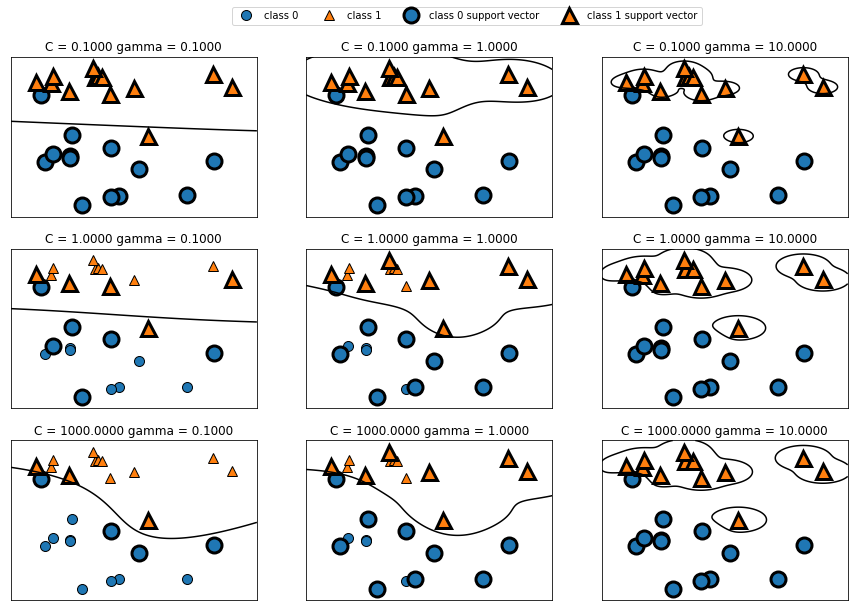

In [68]:
fig, axes = plt.subplots (3, 3, figsize = (15,10))

for ax , C in zip(axes, [-1, 0, 3]):
  for a , gamma in zip(ax, range(-1, 2)):
    mglearn.plots.plot_svm(log_C = C , log_gamma = gamma, ax= a)


axes[0, 0].legend(['class 0', 'class 1', 'class 0 support vector', 'class 1 support vector'],
                  ncol = 4, loc = [.9, 1.2])